In [3]:

import pandas as pd

df= pd.read_csv('data_infarctus.csv')

ModuleNotFoundError: No module named 'pandas'

In [ ]:
from pycaret.classification import *  # si INFARCT est une variable binaire (ce qui semble être le cas)
s = setup(data=df, target='INFARCT')


In [ ]:
s

In [ ]:
df.head(5)


,NUMERO,INFARCT,CO,TABAC,AGE,POIDS,TAILLE,ATCD,HTA
0,1,0,0,0,47,48.0,173,0.0,0
1,2,0,0,0,17,NaN,162,0.0,0
2,3,0,0,0,35,53.0,163,0.0,0
3,4,0,0,0,82,78.0,157,0.0,0
4,5,0,0,0,50,52.0,172,NaN,0


In [ ]:
df.tail()

,NUMERO,INFARCT,CO,TABAC,AGE,POIDS,TAILLE,ATCD,HTA
444,445,1,1,2,31,67.0,162,1.0,0
445,446,1,1,2,30,80.0,154,1.0,0
446,447,1,1,2,42,67.0,167,1.0,1
447,448,1,1,2,35,52.0,172,1.0,1
448,449,1,1,2,49,85.0,170,1.0,1


In [ ]:
df.describe()

,NUMERO,INFARCT,CO,TABAC,AGE,POIDS,TAILLE,ATCD,HTA
count,449.000000,449.000000,449.000000,449.000000,449.000000,437.000000,449.000000,442.000000,449.000000
mean,225.000000,0.331849,0.445434,0.741648,45.619154,66.066362,165.160356,0.119910,0.354120
std,129.759393,0.471402,0.497568,0.796240,16.166397,17.962057,8.105671,0.325224,0.478779
min,1.000000,0.000000,0.000000,0.000000,15.000000,33.000000,138.000000,0.000000,0.000000
25%,113.000000,0.000000,0.000000,0.000000,33.000000,51.000000,160.000000,0.000000,0.000000
50%,225.000000,0.000000,0.000000,1.000000,44.000000,64.000000,166.000000,0.000000,0.000000
75%,337.000000,1.000000,1.000000,1.000000,56.000000,79.000000,171.000000,0.000000,1.000000
max,449.000000,1.000000,1.000000,2.000000,100.000000,128.000000,184.000000,1.000000,1.000000


In [ ]:
df.isnull()

,NUMERO,INFARCT,CO,TABAC,AGE,POIDS,TAILLE,ATCD,HTA
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
444,False,False,False,False,False,False,False,False,False
445,False,False,False,False,False,False,False,False,False
446,False,False,False,False,False,False,False,False,False
447,False,False,False,False,False,False,False,False,False


In [ ]:
df.drop('NUMERO', axis=1, inplace=True)

In [ ]:
df.head()

,INFARCT,CO,TABAC,AGE,POIDS,TAILLE,ATCD,HTA
0,0,0,0,47,48.0,173,0.0,0
1,0,0,0,17,NaN,162,0.0,0
2,0,0,0,35,53.0,163,0.0,0
3,0,0,0,82,78.0,157,0.0,0
4,0,0,0,50,52.0,172,NaN,0


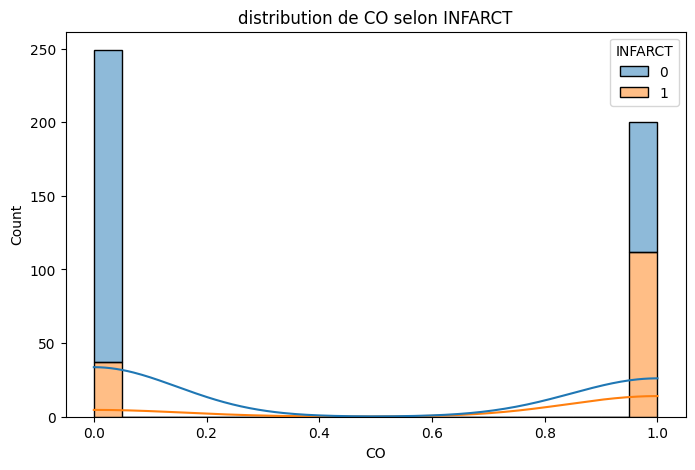

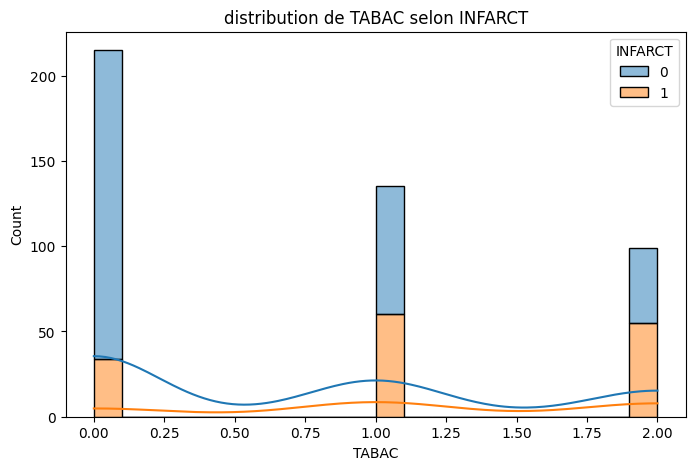

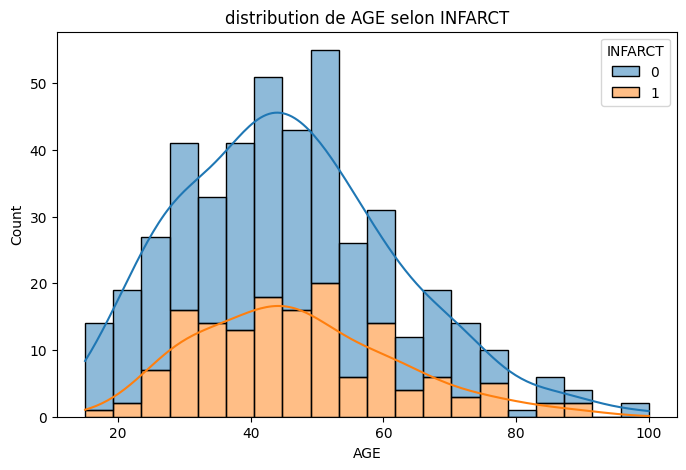

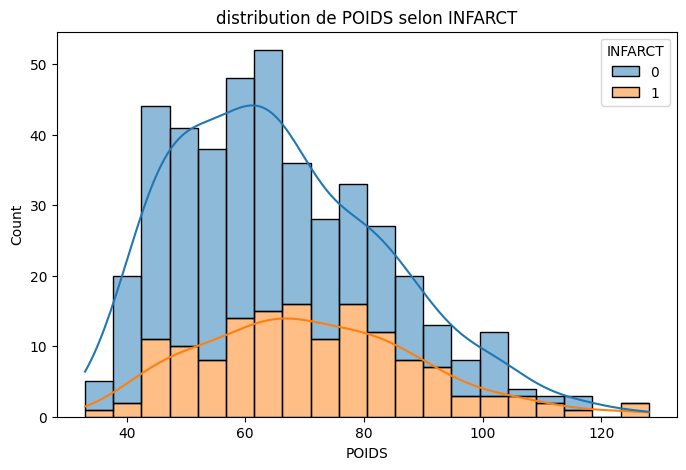

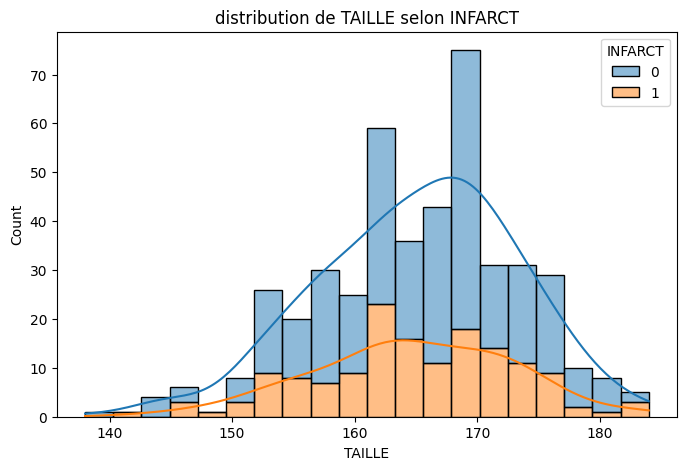

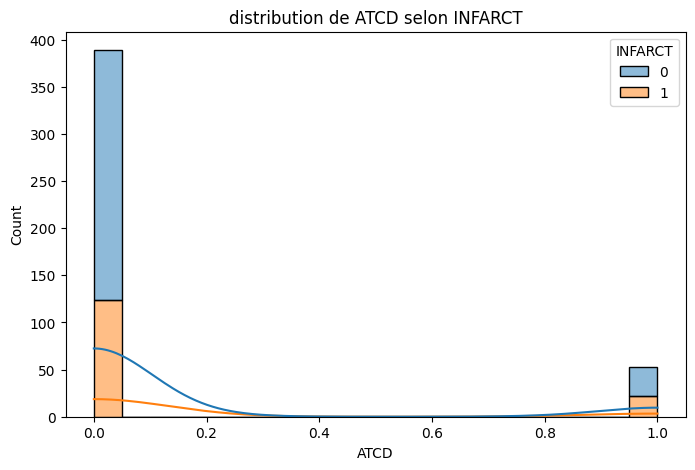

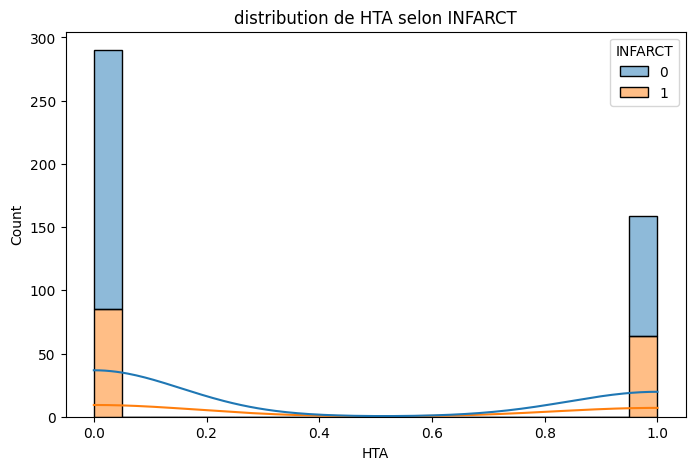

In [ ]:
#histogramme d'infarctus par rapport aux autres
import matplotlib.pyplot as plt
import seaborn as sns

target_var = 'INFARCT' #variable cible
#pour chaque variable numerique (sauf notre variable cible), afficher un histogramme groupe par infarctus
for col in df.columns:
  if col != target_var and pd.api.types.is_numeric_dtype(df[col]):
   plt.figure(figsize=(8, 5))
   sns.histplot(data=df, x=col, hue=target_var, kde=True, bins=20, multiple='stack')
   plt.title(f'distribution de {col} selon {target_var}')
  plt.show()

In [ ]:
#remplacons 0 et 1 par non et oui
df['INFARCT']=df['INFARCT'].replace({0: 'non', 1: 'oui'})

In [ ]:
df

,INFARCT,CO,TABAC,AGE,POIDS,TAILLE,ATCD,HTA
0,non,0,0,47,48.0,173,0.0,0
1,non,0,0,17,NaN,162,0.0,0
2,non,0,0,35,53.0,163,0.0,0
3,non,0,0,82,78.0,157,0.0,0
4,non,0,0,50,52.0,172,NaN,0
...,...,...,...,...,...,...,...,...
444,oui,1,2,31,67.0,162,1.0,0
445,oui,1,2,30,80.0,154,1.0,0
446,oui,1,2,42,67.0,167,1.0,1
447,oui,1,2,35,52.0,172,1.0,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   INFARCT  449 non-null    object 
 1   CO       449 non-null    int64  
 2   TABAC    449 non-null    int64  
 3   AGE      449 non-null    int64  
 4   POIDS    437 non-null    float64
 5   TAILLE   449 non-null    int64  
 6   ATCD     442 non-null    float64
 7   HTA      449 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 28.2+ KB


In [ ]:
#correlation entre la variable infarct et les autres avec le oint biserial correlation
from scipy.stats import pointbiserialr

for col in df.columns:
    if col != 'INFARCT' and pd.api.types.is_numeric_dtype(df[col]):
        coef, p_value = pointbiserialr(df['INFARCT'].replace({'non': 0, 'oui': 1}), df[col])
        print(f"Corrélation point-biserial entre INFARCT et {col} : {coef:.3f} (p-value={p_value:.3f})")



Corrélation point-biserial entre INFARCT et CO : 0.434 (p-value=0.000)
Corrélation point-biserial entre INFARCT et TABAC : 0.354 (p-value=0.000)
Corrélation point-biserial entre INFARCT et AGE : 0.057 (p-value=0.225)
Corrélation point-biserial entre INFARCT et POIDS : nan (p-value=nan)
Corrélation point-biserial entre INFARCT et TAILLE : -0.034 (p-value=0.475)
Corrélation point-biserial entre INFARCT et ATCD : nan (p-value=nan)
Corrélation point-biserial entre INFARCT et HTA : 0.111 (p-value=0.019)


<ipython-input-70-2c1113f7795d>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  coef, p_value = pointbiserialr(df['INFARCT'].replace({'non': 0, 'oui': 1}), df[col])


ModuleNotFoundError: No module named 'pycaret'